# Implementation Lineare Regression und Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

## Schritt 1: Daten sammeln (hier generieren)

In [38]:
num_datapoints = 2000

# Generiere num_datapoints Zufallszahlen zwischen 0 und 10
rng = np.random.default_rng(0)
x = rng.uniform(0,10,num_datapoints)

# Prädiziere y = m*x+b
m = 4
b = 1.5

y_lin = m*x+b

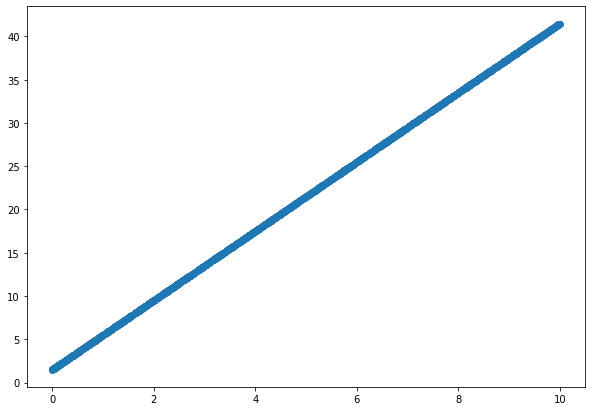

In [3]:
plt.figure(figsize=(10,7))
plt.plot(x, y_lin, 'o');

In [39]:
# Addiere Zufallszahl zu y
y = y_lin + rng.normal(0,2.0,num_datapoints)

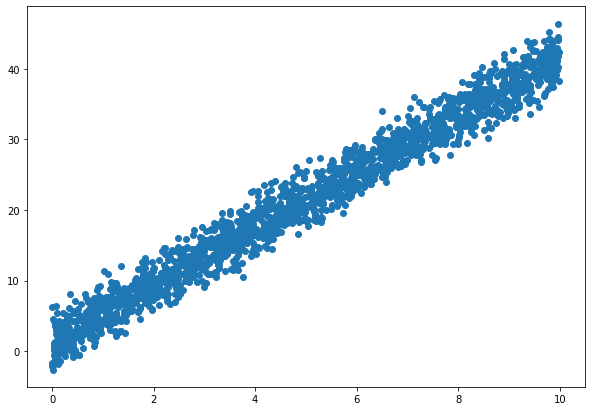

In [5]:
plt.figure(figsize=(10,7))
plt.plot(x, y, 'o');

## Schritt 2: Daten aufbereiten

In [6]:
# Aufteilung in Traings- und Testdaten (80:20)
training_data = np.array(x[0:1599])
test_data_x = np.array(x[1600:])
test_data_y = np.array(y[1600:])

In [7]:
# Aufteilung in k-Folds
kf = KFold(n_splits=3)
for train_index, val_index in kf.split(training_data):
    print("Train first index", train_index[0], ", last index:", train_index[-1])
    print("Val first index", val_index[0], ", last index:", val_index[-1])

Train first index 533 , last index: 1598
Val first index 0 , last index: 532
Train first index 0 , last index: 1598
Val first index 533 , last index: 1065
Train first index 0 , last index: 1065
Val first index 1066 , last index: 1598


## Schritt 3: Model trainieren

### Kostenfunktion:

![equation](https://bit.ly/3xqA8mz)

In [8]:
def cost_function(theta, x, y):
    return sum(pow(theta[0]+theta[1]*x-y,2))/2/len(x)

print("Cost function value:", cost_function(np.array([b, m]), x, y_lin))

Cost function value: 0.0


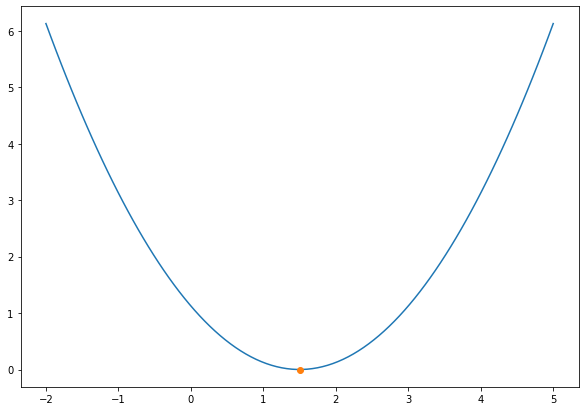

In [30]:
theta_0_plot = np.linspace(-2, 5, 100)
y_plot = np.empty([100,1])
for theta_0, i in zip(theta_0_plot, range(0,100)):
    y_plot[i] = cost_function([theta_0, m], x, y_lin)

plt.figure(figsize=(10,7))
plt.plot(theta_0_plot, y_plot);
plt.plot(b, 0, 'o');

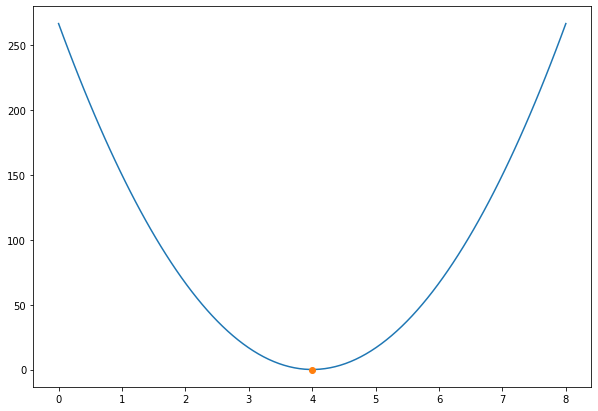

In [32]:
theta_1_plot = np.linspace(0, 8, 100)
y_plot = np.empty([100,1])
for theta_1, i in zip(theta_1_plot, range(0,100)):
    y_plot[i] = cost_function([b, theta_1], x, y_lin)

plt.figure(figsize=(10,7))
plt.plot(theta_1_plot, y_plot);
plt.plot(m, 0, 'o');

### Gradient der Kostenfunktion:

![equation](http://www.sciweavers.org/tex2img.php?eq=%5Cfrac%7B%5Cpartial~J%7D%7B%5Cpartial%20%5Ctheta_0%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20%5Csum_%7Bk%3D1%7D%5Em%20%28%5Ctheta_0%20%2B%20%5Ctheta_1%20x_%7Bk%7D%20-%20y_k%29&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0)

![equation](https://bit.ly/3HkbTeB)

In [33]:
def grad_cost_function_theta0(theta, x, y):
    return sum(theta[0]+theta[1]*x-y)/len(x)

def grad_cost_function_theta1(theta, x, y):
    return sum(np.multiply(theta[0]+theta[1]*x-y, x))/len(x)

print("Grad cost function value theta_0:",grad_cost_function_theta0(np.array([b, m]), x, y_lin))
print("Grad cost function value theta_1:",grad_cost_function_theta1(np.array([b, m]), x, y_lin))

Grad cost function value theta_0: 0.0
Grad cost function value theta_1: 0.0


### Gradient Descent:

![equation](https://bit.ly/3xOCxcl)

* j-ter Eintrag des Parameter theta (0 und 1)
* i-ter Iterationschritt
* alpha: Lernrate

In [34]:
def gradient_descent(x, y, theta_start=np.array([0.0, 0.0]), tol=1e-5, learn_rate=0.03, max_iters=1e4):
    
    current_iter = 0
    previous_step_size = 1
    theta = theta_start
    
    while previous_step_size > tol and current_iter < max_iters:
        theta_old = np.array(theta)
        
        theta[0] = theta_old[0] - learn_rate*grad_cost_function_theta0(theta_old, x, y)
        theta[1] = theta_old[1] - learn_rate*grad_cost_function_theta1(theta_old, x, y)
        
        current_iter = current_iter + 1
        previous_step_size = np.linalg.norm(theta - theta_old)

    print("Anzahl Iterationen: ", current_iter)
    
    return theta
        
print("Ergebnis Gradient Descent:", gradient_descent(x, y_lin))

Anzahl Iterationen:  871
Ergebnis Gradient Descent: [1.49868403 4.00019838]


In [40]:
theta_opt = []
run = 0;

for train_index, val_index in kf.split(training_data):
    x_train, x_val = training_data[train_index], training_data[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    theta = np.array(gradient_descent(x_train, y_train))
    theta_opt.append(theta)
        
    print("Run:", run) 
    print("Theta opt:", theta)
    print("Kostenfunktion Theta opt:", cost_function(theta, x_train, y_train))
    print("Kostenfunktion m and b:  ", cost_function(np.array([b,m]), x_train, y_train))
    print("")
    
    run = run + 1

Anzahl Iterationen:  455
Run: 0
Theta opt: [1.45975162 4.00439644]
Kostenfunktion Theta opt: 2.0286844167308096
Kostenfunktion m and b:   2.028949526952682

Anzahl Iterationen:  157
Run: 1
Theta opt: [1.46264143 4.00406346]
Kostenfunktion Theta opt: 2.042009075041762
Kostenfunktion m and b:   2.0422035183324905

Anzahl Iterationen:  637
Run: 2
Theta opt: [1.5774688  3.97206341]
Kostenfunktion Theta opt: 1.943567320968956
Kostenfunktion m and b:   1.9489312536930739



## Schritt 4: Model auswerten

1.962341389943261
1.9621852450728852
1.9356615796515355
1.935677262313267
2.138154926288893
2.1222217915920902


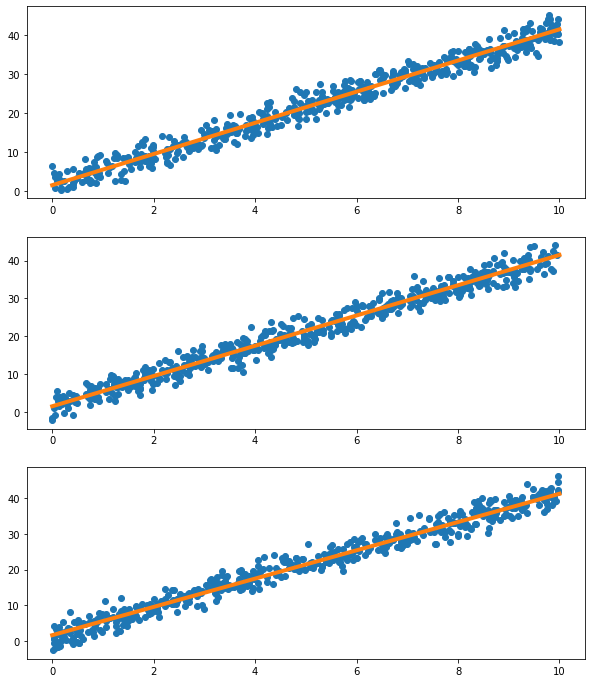

In [41]:
fig, axs = plt.subplots(3,figsize=(10,12))

run = 0;

for train_index, val_index in kf.split(training_data):
    x_train, x_val = training_data[train_index], training_data[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    print(cost_function(theta_opt[run], x_val, y_val))
    print(cost_function(np.array([b,m]), x_val, y_val))
    
    x_plot = np.linspace(0,10,10)
    y_plot = theta_opt[run][0] + x_plot*theta_opt[run][1]
    
    axs[run].plot(x_val, y_val, 'o')
    axs[run].plot(x_plot, y_plot, linewidth=4)
    
    run = run + 1

## Schritt 5: Parametertuning

Beispielhaft: Wiederholung von Schritt 3 mit verringerter Lernrate

In [42]:
for train_index, val_index in kf.split(training_data):
    x_train, x_val = training_data[train_index], training_data[val_index]
    y_train, y_val = y[train_index], y[val_index]
       
    theta = gradient_descent(x_train, y_train, learn_rate=0.01)
    print(theta)
    print(cost_function(theta, x_train, y_train))
    print(cost_function(np.array([b,m]), x_train, y_train))

Anzahl Iterationen:  1370
[1.46238593 4.00399775]
2.028686181682959
2.028949526952682
Anzahl Iterationen:  5
[1.46241831 4.00408522]
2.0420091569237897
2.0422035183324905
Anzahl Iterationen:  1437
[1.57461122 3.9724919 ]
1.9435692359850898
1.9489312536930739


## Schritt 6: Testdaten

1.9174055498017315
1.9195269602517369
1.9193672908959982
1.9300427895480643


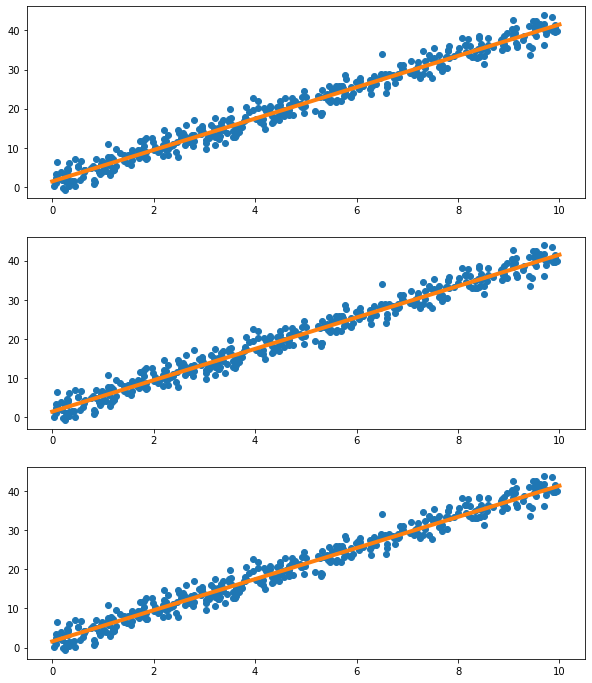

In [43]:
fig, axs = plt.subplots(3,figsize=(10,12))
print(cost_function(np.array([b,m]), test_data_x, test_data_y))

for run in range(3):    
    print(cost_function(theta_opt[run], test_data_x, test_data_y))
    
    x_plot = np.linspace(0,10,10)
    y_plot = theta_opt[run][0] + x_plot*theta_opt[run][1]
    
    axs[run].plot(test_data_x, test_data_y, 'o')
    axs[run].plot(x_plot, y_plot, linewidth=4)
    
    run = run + 1